# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


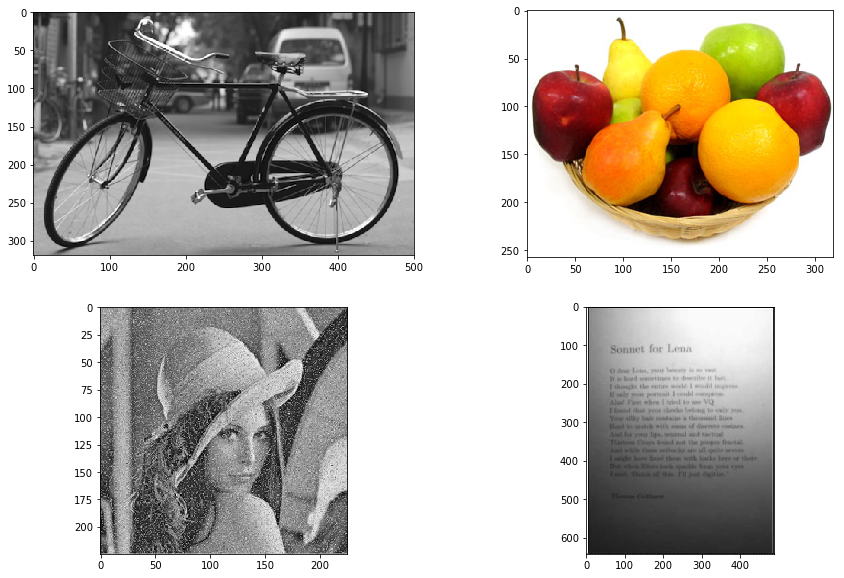

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import numpy as np
%matplotlib inline

imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc,cmap='gray')
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


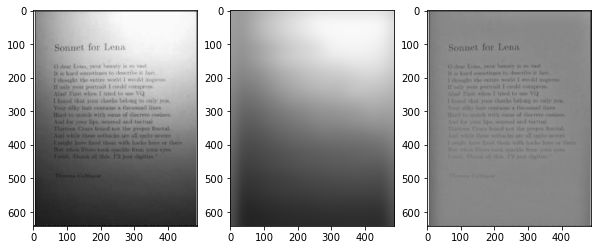

In [160]:
#task 3
from scipy import ndimage as nimg
import numpy as np

G = nimg.gaussian_filter(imbook, sigma=20)
r = imbook-G
miN = np.amin(r)
maX = np.amax(r)
r = (r-miN)/(maX-miN) #color correction formula

fig = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(imbook)
plt.subplot(132)
plt.imshow(G)
plt.subplot(133)
plt.imshow(r)

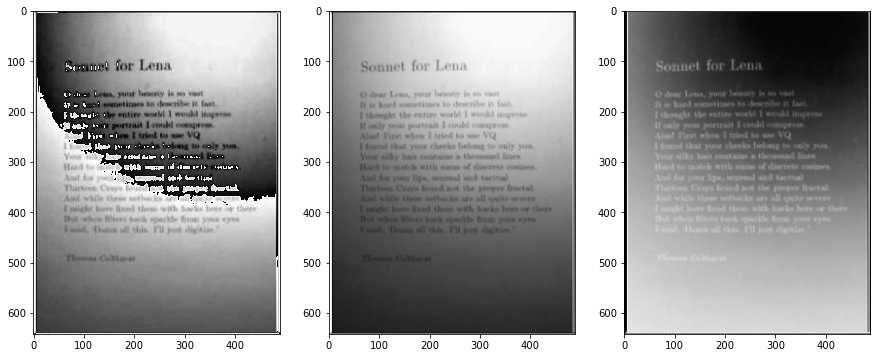

In [41]:
#task 1 (convolve filtering of the "imbook")
from scipy import ndimage
import numpy as np

k = np.ones((2, 1, 1))
#imbook.shape
flt = ndimage.convolve(imbook, k, mode='reflect', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbook,cmap='gray')
plt.subplot(133)
plt.imshow((imbook-flt),cmap='gray')


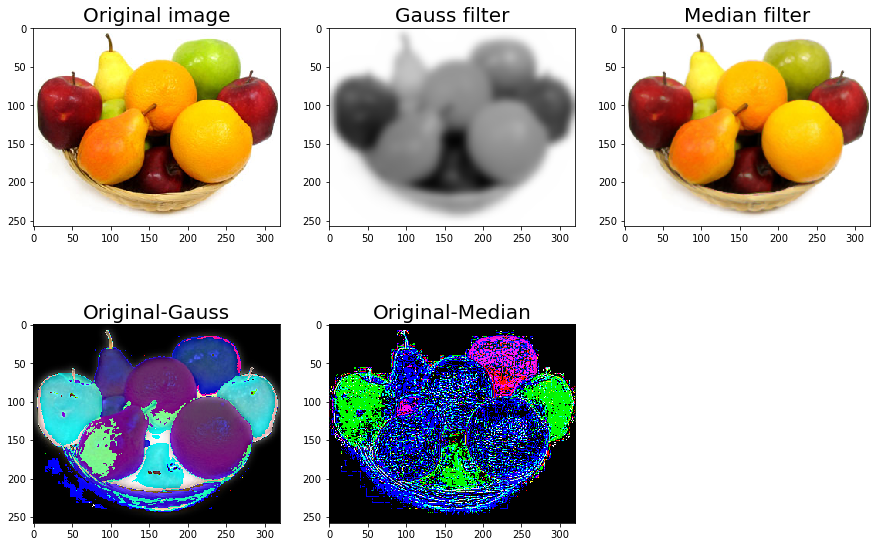

In [60]:
# task 1 (gauss filter and median filter)
from scipy import ndimage as nimg
import numpy as np

gflt = nimg.gaussian_filter(imfru, sigma=5)
im_med = nimg.median_filter(imfru, 3)

fig = plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(imfru,cmap='gray')
plt.title('Original image', fontsize=20)
plt.subplot(232)
plt.imshow(gflt,cmap='gray')
plt.title('Gauss filter', fontsize=20)
plt.subplot(233)
plt.imshow(im_med,cmap='gray')
plt.title('Median filter', fontsize=20)
plt.subplot(234)
plt.imshow((imfru-gflt),cmap='gray')
plt.title('Original-Gauss', fontsize=20)
plt.subplot(235)
plt.imshow((imfru-im_med),cmap='gray')
plt.title('Original-Median', fontsize=20)


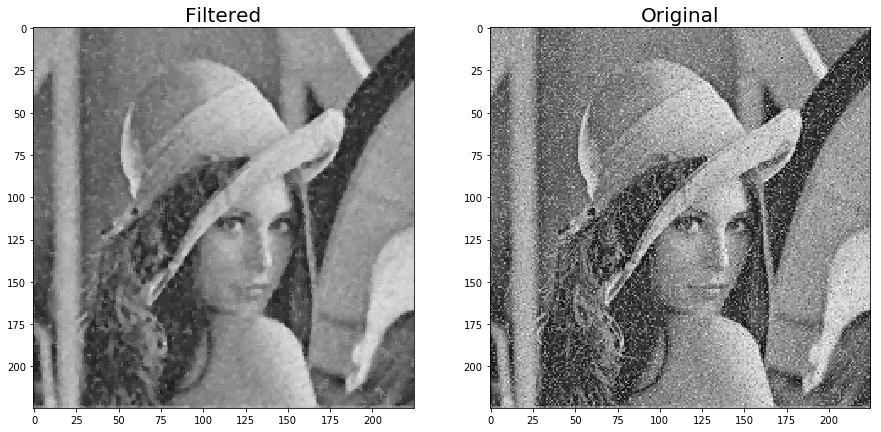

In [28]:
#task 2 (filtering the 'salt and pepper' noise using Median filter)
from scipy import ndimage as nimg
import numpy as np

#imlen.shape
im_medl = nimg.median_filter(imlen, 3)
fig = plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im_medl,interpolation='nearest')
plt.title('Filtered', fontsize=20)
plt.subplot(122)
plt.imshow(imlen,cmap='gray')
plt.title('Original', fontsize=20)